In [1]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

from gradiente import *

## <center> Revisão </center>

## <center> Função objetivo (custo) </center>

A função objetivo a qual desejamos minimizar na regressão linear é:

$$L(\boldsymbol{\beta}) = \frac{1}{n} || \textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1 ||^2 = \frac{1}{n} (\textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1 )^t(\textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1)$$


\\

$$ \frac{\partial L}{\partial \boldsymbol{\beta}} = \begin{cases}
 \frac{\partial L}{\beta_0}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1||\textbf{u} = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1)^t \textbf{u} \\ \\
 \frac{\partial L}{\beta_1}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1||\textbf{x}_1 = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1)^t \textbf{x}_1 \\ 
\end{cases}$$


Podemos expandir a função objetivo para um modelo de multiplas variáveis:

$$L(\boldsymbol{\beta}) = \frac{1}{n} || \textbf{y} - \beta_0 \textbf{u} - \beta_1 \textbf{x}_1 - \beta_2 \textbf{x}_2 + ... - \beta_j \textbf{x}_j ||^2 $$

\\


$$ \frac{\partial L}{\partial \boldsymbol{\beta}} = \begin{cases}
 \frac{\partial L}{\beta_0}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1 - \beta_2\textbf{x}_2 - ... + \beta_j \textbf{x}_j||\textbf{u} = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1-\beta_2\textbf{x}_2 - ... - \beta_j \textbf{x}_j)^t \textbf{u} \\ \\
  \frac{\partial L}{\beta_1}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1 - \beta_2\textbf{x}_2 - ... + \beta_j \textbf{x}_j||\textbf{x}_1 = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1-\beta_2\textbf{x}_2 - ... - \beta_j \textbf{x}_j)^t \textbf{x}_1 \\ \\
 \frac{\partial L}{\beta_2}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1 - \beta_2\textbf{x}_2 - ... + \beta_j \textbf{x}_j||\textbf{x}_2 = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1-\beta_2\textbf{x}_2 - ... - \beta_j \textbf{x}_j)^t \textbf{x}_2\\ \\
 \vdots \; \; \; = \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \vdots \\ \\
  \frac{\partial L}{\beta_j}= 2 ||\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1 - \beta_2\textbf{x}_2 - ... + \beta_j \textbf{x}_j||\textbf{x}_j\ = (\textbf{y}-\beta_0 \textbf{u} -\beta_1 \textbf{x}_1-\beta_2\textbf{x}_2 - ... - \beta_j \textbf{x}_j)^t \textbf{x}_j\\ \\
\end{cases}$$


In [2]:
from gradiente import *

#### Gerando um Dataset sintético:

A função utilizada para gerar o conjunto de dados sintético será:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

onde $\beta_0 = 7$, $\beta_1 = 3$ e $\beta_2 = 15$, ou seja:

$$ y = 7 + 2x_1+ 5x_2 $$

onde $x_2 = x_1^3$

In [3]:
X = 8*np.random.rand(250) -4 #Gerando as observações aleatóriamente
y = 5*X**3 + 2*X + 7 + 50*np.random.normal(size=250) # adicionando um ruído no dado observado

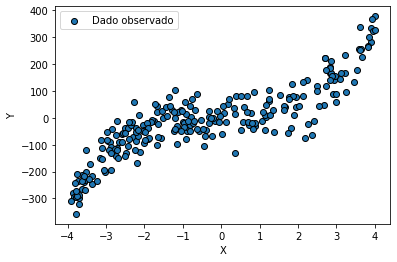

In [4]:
plt.scatter(X,y,edgecolor='black',label='Dado observado')
plt.xlabel('X') ; plt.ylabel('Y')
plt.legend()

In [5]:
data = pd.DataFrame({'yobs':y,'x':X,'x2':X**3})
data.head()

,yobs,x,x2
0,-201.976021,-3.509934,-43.241103
1,-127.250113,-2.124267,-9.585777
2,118.965196,2.734976,20.457866
3,-357.441967,-3.771227,-53.634968
4,-75.930669,2.187708,10.470521


#### Obtendo os parâmetros do modelo

In [12]:
beta_ini = 5*np.random.normal(size=3)
beta_ini

array([-2.8473988 , -1.29384774, -0.13793594])

In [13]:
X_m = data[['x','x2']]
X_m.head()

,x,x2
0,-3.509934,-43.241103
1,-2.124267,-9.585777
2,2.734976,20.457866
3,-3.771227,-53.634968
4,2.187708,10.470521


In [48]:
beta_calc, cost_hist, beta_hist = gradient_descent(X_m[['x','x2']],y,beta_ini,alpha=0.00005,ninter=400)

In [49]:
X_m['u'] = 1

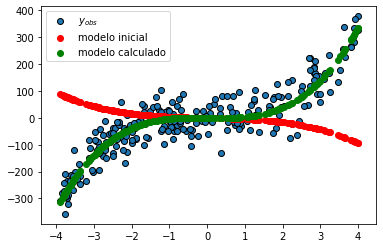

In [50]:
plt.scatter(X,y,edgecolor='black',label='$y_{obs}$')

plt.scatter(X_m['x'],predict(beta_ini,X_m),c='red',label='modelo inicial')

plt.scatter(X_m['x'],predict(beta_calc,X_m),c='green',label='modelo calculado')

plt.legend()

In [51]:
cost_hist[0]

26465.268201829218

In [52]:
cost_hist[-1]

2463.5364963809466

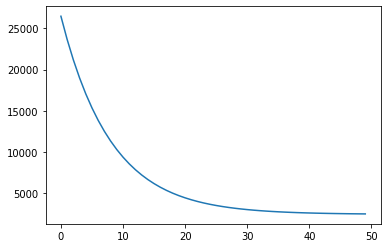

In [56]:
plt.plot(cost_hist[0:50])

In [38]:
beta_calc

array([-1.95000797,  5.37224001,  0.22893444])